In [20]:
#run in python 3.10.7 on windows

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

auckland_rain = pd.read_csv('../data/auckland_rain_temp_statsNZ.csv', parse_dates=['Date'])
auckland_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          20819 non-null  object 
 1   Rainfall(mm)  20819 non-null  float64
 2   Tavg          20819 non-null  float64
 3   Tmax          20819 non-null  float64
 4   Tmin          20819 non-null  float64
dtypes: float64(4), object(1)
memory usage: 813.4+ KB


In [21]:
auckland_rain.head()

,Date,Rainfall(mm),Tavg,Tmax,Tmin
0,1/01/1966,0.0,18.0,22.2,13.9
1,2/01/1966,26.2,20.5,23.9,17.1
2,3/01/1966,0.0,20.3,23.5,17.1
3,4/01/1966,0.0,20.3,24.4,16.2
4,5/01/1966,1.3,20.6,23.4,17.8


In [22]:
# Summary Statistics
print(auckland_rain.describe())

       Rainfall(mm)          Tavg          Tmax          Tmin
count  20819.000000  20819.000000  20819.000000  20819.000000
mean       3.017811     15.463764     19.009117     11.918176
std        7.304329      3.750680      3.876209      4.030235
min        0.000000      5.000000      8.100000     -0.300000
25%        0.000000     12.600000     15.900000      9.200000
50%        0.000000     15.400000     18.700000     12.100000
75%        2.600000     18.400000     22.100000     15.000000
max      161.800000     25.600000     30.500000     22.900000


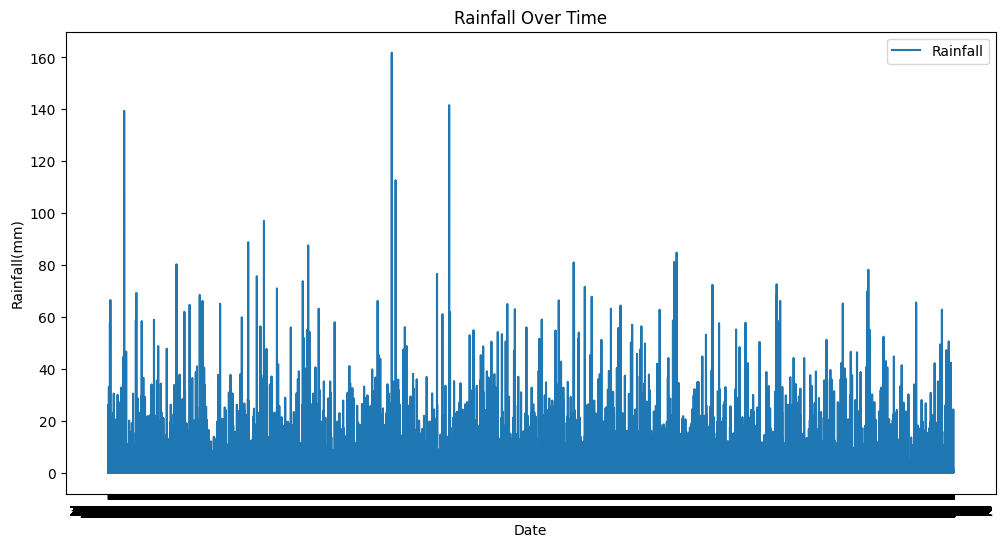

In [23]:
# Data Visualization

# Time series plot of rainfall
plt.figure(figsize=(12, 6))
plt.plot(auckland_rain['Date'], auckland_rain['Rainfall(mm)'], label='Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall(mm)')
plt.title('Rainfall Over Time')
plt.legend()
plt.show()

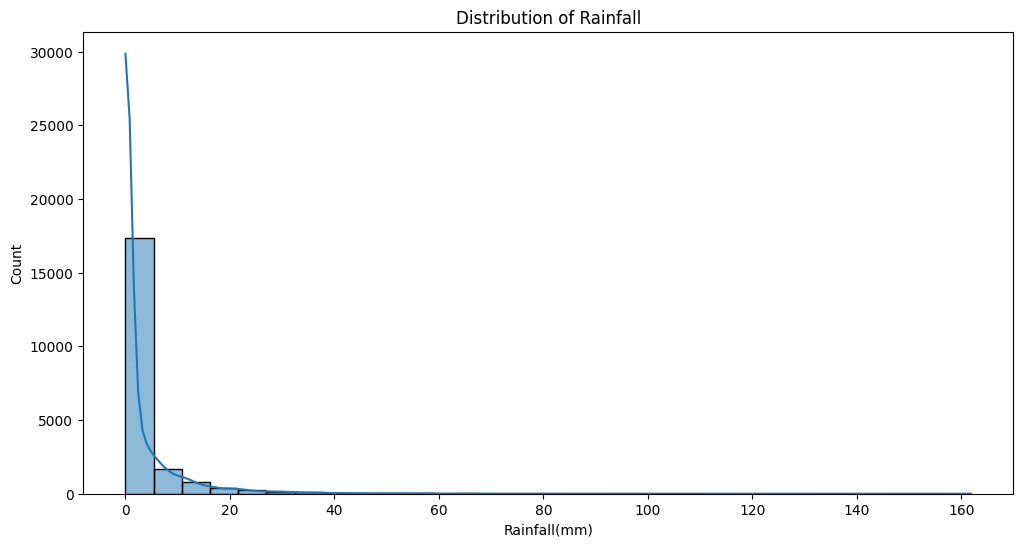

In [24]:
# Histograms
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data=auckland_rain, x='Rainfall(mm)', bins=30, kde=True)
plt.xlabel('Rainfall(mm)')
plt.title('Distribution of Rainfall')
plt.show()

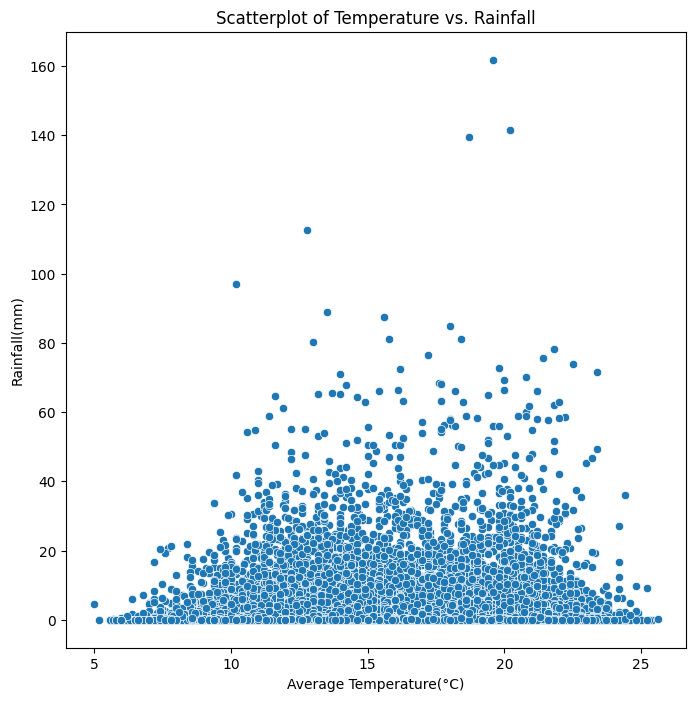

In [25]:
# Scatterplot
plt.figure(figsize=(8, 8))
sns.scatterplot(data=auckland_rain, x='Tavg', y='Rainfall(mm)')
plt.xlabel('Average Temperature(°C)')
plt.ylabel('Rainfall(mm)')
plt.title('Scatterplot of Temperature vs. Rainfall')
plt.show()

In [26]:
# Handling Missing Data
missing_data = auckland_rain.isnull().sum()
print(missing_data)

Date            0
Rainfall(mm)    0
Tavg            0
Tmax            0
Tmin            0
dtype: int64


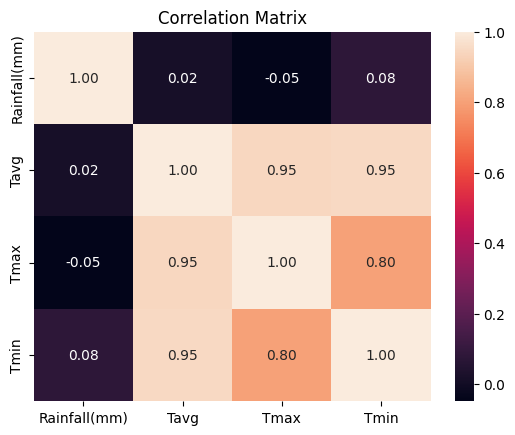

In [34]:
# Correlation Analysis
numeric_columns = auckland_rain.select_dtypes(include=[np.number]).columns
correlation_matrix = auckland_rain[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True,  fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [36]:
# Create lag features for prevous 7 days of rainfall and temperature
lag_size = 7

# Create lag features for 'Rainfall (mm)'
for i in range(1, lag_size + 1):
    auckland_rain[f'Rainfall_lag_{i}'] = auckland_rain['Rainfall(mm)'].shift(i)

for i in range(1, lag_size + 1):
    auckland_rain[f'Tavg_lag_{i}'] = auckland_rain['Tavg'].shift(i)
    
for i in range(1, lag_size + 1):
    auckland_rain[f'Tmax_lag_{i}'] = auckland_rain['Tmax'].shift(i)
    
for i in range(1, lag_size + 1):
    auckland_rain[f'Tmin_lag_{i}'] = auckland_rain['Tmin'].shift(i)


# Drop rows with NaN values due to lag features
auckland_rain.dropna(inplace=True)

auckland_rain.head(10)

,Date,Rainfall(mm),Tavg,Tmax,Tmin,Rainfall_lag_1,Rainfall_lag_2,Rainfall_lag_3,Rainfall_lag_4,Rainfall_lag_5,...,Tmax_lag_5,Tmax_lag_6,Tmax_lag_7,Tmin_lag_1,Tmin_lag_2,Tmin_lag_3,Tmin_lag_4,Tmin_lag_5,Tmin_lag_6,Tmin_lag_7
7,8/01/1966,1.3,19.7,22.1,17.3,5.1,8.9,1.3,0.0,0.0,...,23.5,23.9,22.2,16.3,18.6,17.8,16.2,17.1,17.1,13.9
8,9/01/1966,2.5,17.8,19.7,15.9,1.3,5.1,8.9,1.3,0.0,...,24.4,23.5,23.9,17.3,16.3,18.6,17.8,16.2,17.1,17.1
9,10/01/1966,0.0,16.2,18.0,14.4,2.5,1.3,5.1,8.9,1.3,...,23.4,24.4,23.5,15.9,17.3,16.3,18.6,17.8,16.2,17.1
10,11/01/1966,0.5,16.8,19.3,14.4,0.0,2.5,1.3,5.1,8.9,...,23.4,23.4,24.4,14.4,15.9,17.3,16.3,18.6,17.8,16.2
11,12/01/1966,0.5,18.0,20.5,15.6,0.5,0.0,2.5,1.3,5.1,...,23.7,23.4,23.4,14.4,14.4,15.9,17.3,16.3,18.6,17.8
12,13/01/1966,0.0,17.0,18.9,15.1,0.5,0.5,0.0,2.5,1.3,...,22.1,23.7,23.4,15.6,14.4,14.4,15.9,17.3,16.3,18.6
13,14/01/1966,0.5,16.8,18.7,14.9,0.0,0.5,0.5,0.0,2.5,...,19.7,22.1,23.7,15.1,15.6,14.4,14.4,15.9,17.3,16.3
14,15/01/1966,0.0,18.6,22.1,15.1,0.5,0.0,0.5,0.5,0.0,...,18.0,19.7,22.1,14.9,15.1,15.6,14.4,14.4,15.9,17.3
15,16/01/1966,0.0,18.8,24.6,12.9,0.0,0.5,0.0,0.5,0.5,...,19.3,18.0,19.7,15.1,14.9,15.1,15.6,14.4,14.4,15.9
16,17/01/1966,0.0,18.3,22.6,14.0,0.0,0.0,0.5,0.0,0.5,...,20.5,19.3,18.0,12.9,15.1,14.9,15.1,15.6,14.4,14.4


In [38]:
auckland_rain.columns

Index(['Date', 'Rainfall(mm)', 'Tavg', 'Tmax', 'Tmin', 'Rainfall_lag_1',
       'Rainfall_lag_2', 'Rainfall_lag_3', 'Rainfall_lag_4', 'Rainfall_lag_5',
       'Rainfall_lag_6', 'Rainfall_lag_7', 'Tavg_lag_1', 'Tavg_lag_2',
       'Tavg_lag_3', 'Tavg_lag_4', 'Tavg_lag_5', 'Tavg_lag_6', 'Tavg_lag_7',
       'Tmax_lag_1', 'Tmax_lag_2', 'Tmax_lag_3', 'Tmax_lag_4', 'Tmax_lag_5',
       'Tmax_lag_6', 'Tmax_lag_7', 'Tmin_lag_1', 'Tmin_lag_2', 'Tmin_lag_3',
       'Tmin_lag_4', 'Tmin_lag_5', 'Tmin_lag_6', 'Tmin_lag_7'],
      dtype='object')

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
features = ['Tavg', 'Tmax', 'Tmin', 'Rainfall_lag_1',
       'Rainfall_lag_2', 'Rainfall_lag_3', 'Rainfall_lag_4', 'Rainfall_lag_5',
       'Rainfall_lag_6', 'Rainfall_lag_7', 'Tavg_lag_1', 'Tavg_lag_2',
       'Tavg_lag_3', 'Tavg_lag_4', 'Tavg_lag_5', 'Tavg_lag_6', 'Tavg_lag_7',
       'Tmax_lag_1', 'Tmax_lag_2', 'Tmax_lag_3', 'Tmax_lag_4', 'Tmax_lag_5',
       'Tmax_lag_6', 'Tmax_lag_7', 'Tmin_lag_1', 'Tmin_lag_2', 'Tmin_lag_3',
       'Tmin_lag_4', 'Tmin_lag_5', 'Tmin_lag_6', 'Tmin_lag_7']

X = auckland_rain[features]

y = auckland_rain['Rainfall(mm)']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest

In [45]:
# Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Get the names of features
feature_names = X.columns

# Sort features based on importance
sorted_idx = feature_importances.argsort()[::-1]

# Print feature importance ranking
print("Feature ranking:")
for f in range(len(sorted_idx)):
    print(f"{f + 1}. Feature '{feature_names[sorted_idx[f]]}' ({feature_importances[sorted_idx[f]]})")


Feature ranking:
1. Feature 'Rainfall_lag_1' (0.07209191239649503)
2. Feature 'Tmin' (0.06269867522062444)
3. Feature 'Tmax' (0.05406121702542085)
4. Feature 'Tmin_lag_1' (0.0395406609232473)
5. Feature 'Tavg' (0.03935954475966416)
6. Feature 'Tmax_lag_2' (0.03743758720594408)
7. Feature 'Tmax_lag_3' (0.03538238532666877)
8. Feature 'Tmax_lag_6' (0.034820532399489325)
9. Feature 'Tmax_lag_1' (0.03374465190892807)
10. Feature 'Tmin_lag_4' (0.033582413023227335)
11. Feature 'Tmax_lag_4' (0.03218065507740202)
12. Feature 'Tmin_lag_6' (0.03126563501778258)
13. Feature 'Tmin_lag_5' (0.030708929045881562)
14. Feature 'Tmin_lag_2' (0.029869530505963044)
15. Feature 'Tmax_lag_7' (0.02978393081539176)
16. Feature 'Tmin_lag_7' (0.02965779322993276)
17. Feature 'Tmin_lag_3' (0.029411020549609392)
18. Feature 'Tmax_lag_5' (0.028627637278268135)
19. Feature 'Tavg_lag_3' (0.02846236968881119)
20. Feature 'Tavg_lag_2' (0.028332017936157205)
21. Feature 'Tavg_lag_6' (0.02737691929626946)
22. Feature '

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Make predictions
rf_predictions = rf_model.predict(X_test)
print(f'Random Forest Prediction for tomorrow: {rf_predictions[0]} mm')


# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, rf_predictions))

# Calculate MAE
mae = mean_absolute_error(y_test, rf_predictions)

# Calculate MSE
mse = mean_squared_error(y_test, rf_predictions)

# Calculate R2 score
r2 = r2_score(y_test, rf_predictions)

# Print the metrics
print("Random Foreset Root Mean Squared Error (RMSE):", rmse)
print("Random Foreset Mean Absolute Error (MAE):", mae)
print("Random Foreset Mean Squared Error (MSE):", mse)
print("Random Foreset R2 Score:", r2)

Random Forest Prediction for tomorrow: 2.2220000000000004 mm
Random Foreset Root Mean Squared Error (RMSE): 6.863124696279756
Random Foreset Mean Absolute Error (MAE): 3.9560076867643525
Random Foreset Mean Squared Error (MSE): 47.10248059668508
Random Foreset R2 Score: 0.011892395011737333


In [47]:
print('Shape of X_train:', X_train.shape)

Shape of X_train: (16649, 31)


In [48]:
# Calculate monthly median rainfall
monthly_median_rainfall = auckland_rain.groupby(auckland_rain['date'].dt.month)['rainfall(mm)'].median()

# Calculate the percentage of actual rainfall compared to the monthly median
auckland_rain['rainfall_percentage'] = (auckland_rain['rainfall(mm)'] / monthly_median_rainfall[auckland_rain['date'].dt.month].values) * 100

# Create a function to categorize the weather conditions
def categorize_rainfall_condition(percentage):
    if percentage > 200:
        return "Very wet"
    elif percentage > 110:
        return "Moderately wet"
    elif percentage > 90:
        return "Near normal"
    elif percentage > 50:
        return "Moderately dry"
    else:
        return "Very dry"

# Apply the categorization function to create a new column with the weather condition
auckland_rain['weather_condition'] = auckland_rain['rainfall_percentage'].apply(categorize_rainfall_condition)

# Print the resulting dataframe with weather conditions
print(auckland_rain[['date', 'rainfall(mm)', 'rainfall_percentage', 'weather_condition']])


KeyError: 'date'